# TP1

# Consigna

![alt text for screen readers](consigna.png "")

In [9]:
import numpy as np
from scipy.fft import fft2, ifft2
import cv2 as cv
import matplotlib.pyplot as plt

In [54]:

def create_gauss_filter(h, w, k_size, sigma):
    x = np.linspace(-(w//2), w//2, w)
    y = np.linspace(-(h//2), h//2, h)
    xx, yy = np.meshgrid(x, y)
    kernel = (1 / (2 * np.pi * sigma**2)) * np.exp(-((xx**2 + yy**2) / (2 * sigma**2)))

    # Normalizar el kernel para asegurar que la suma de todos los elementos sea igual a 1
    kernel /= np.sum(kernel)

    # Calcular la transformada de Fourier del kernel
    kernel_fft = np.fft.fft2(kernel)

    return kernel, kernel_fft

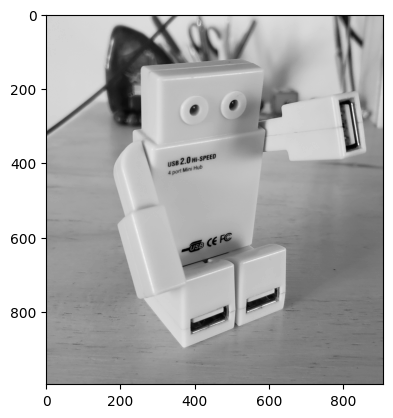

In [37]:
image = cv.cvtColor(cv.imread('../../Material_TPs/TP1/coord_cromaticas/CoordCrom_1.png'), cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

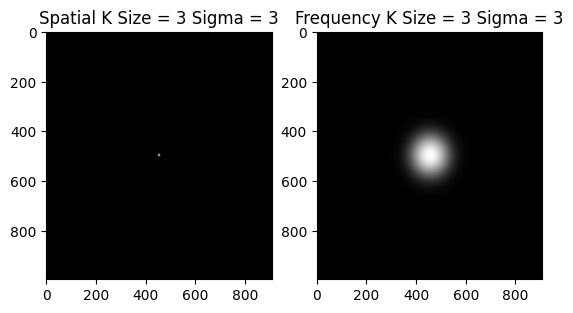

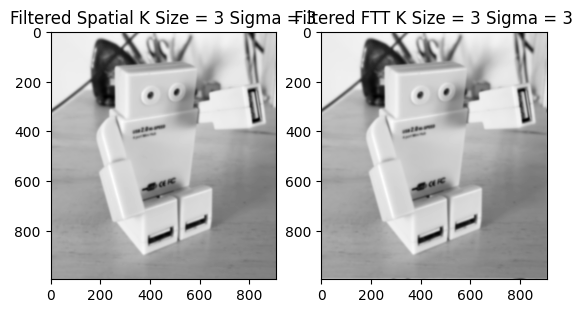

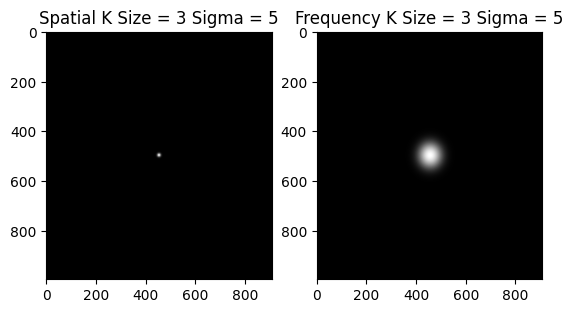

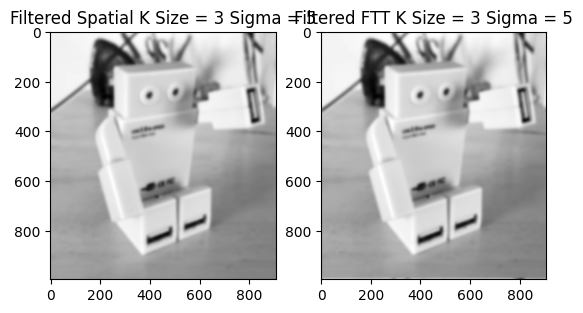

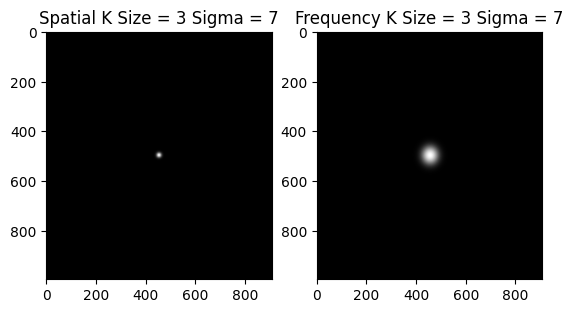

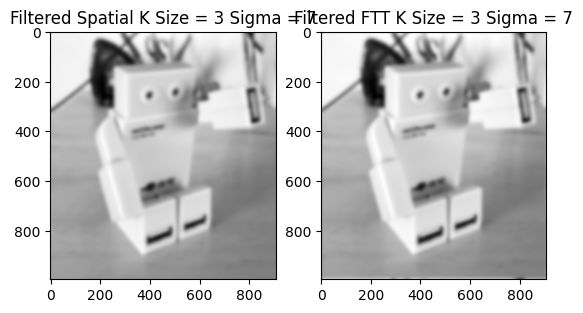

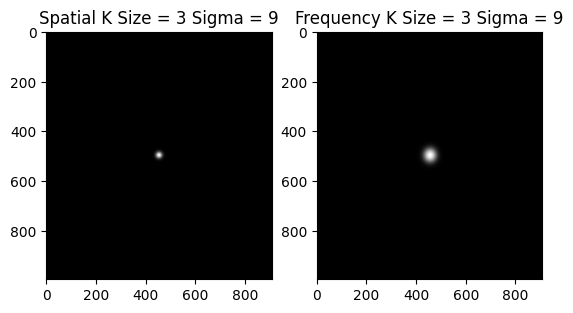

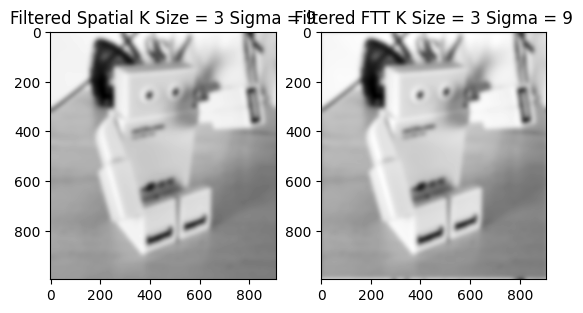

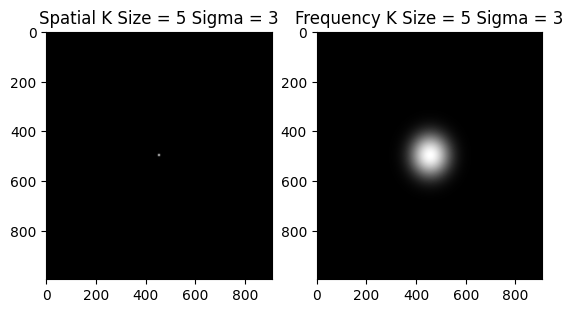

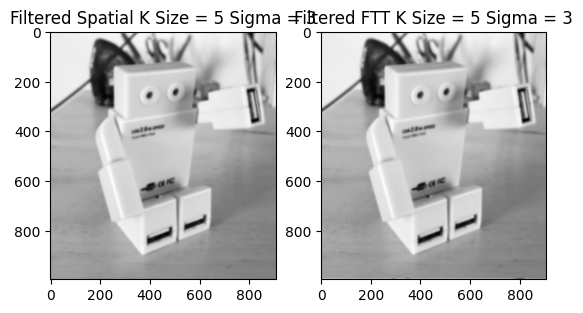

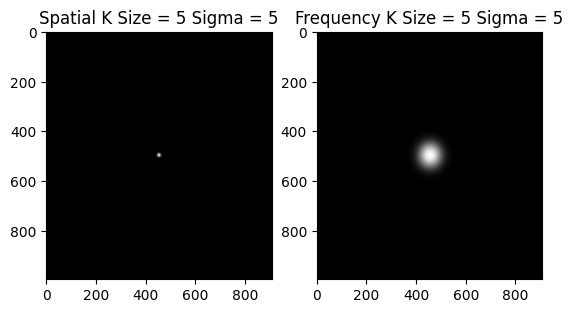

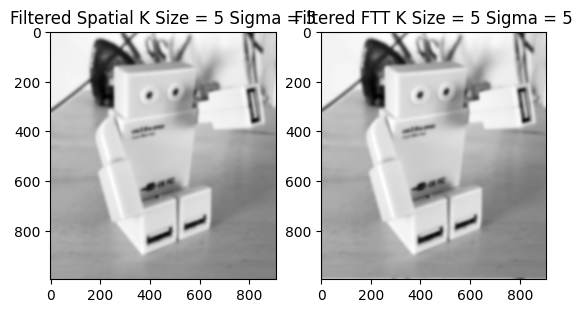

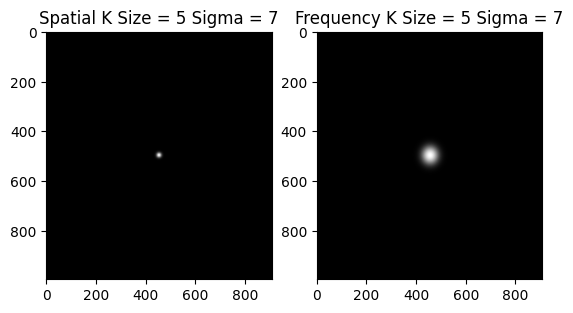

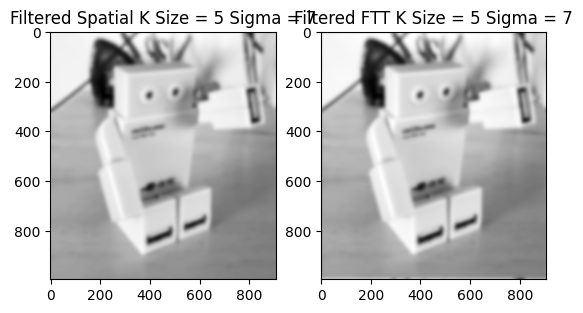

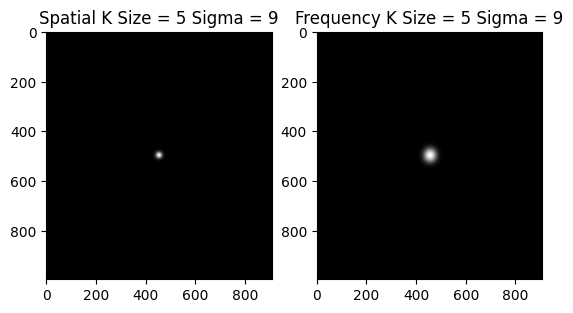

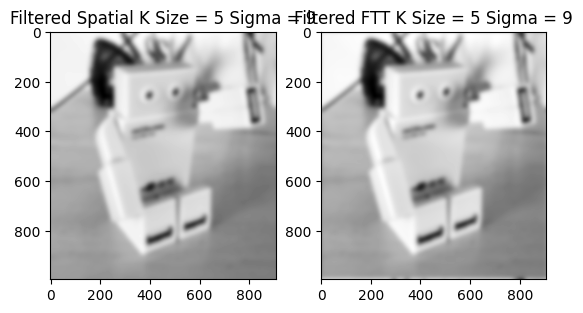

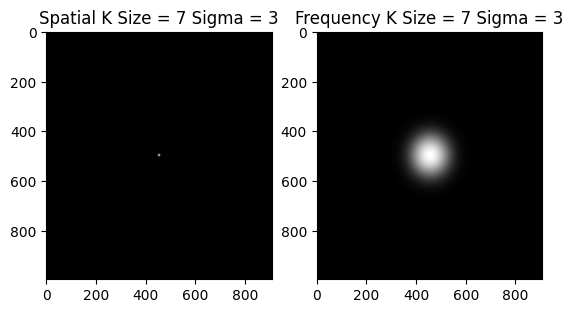

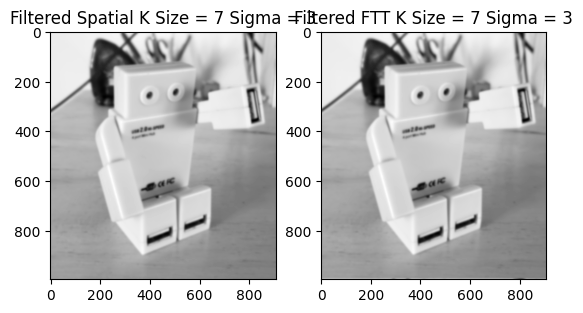

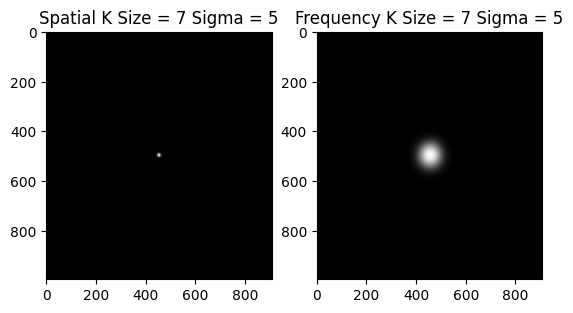

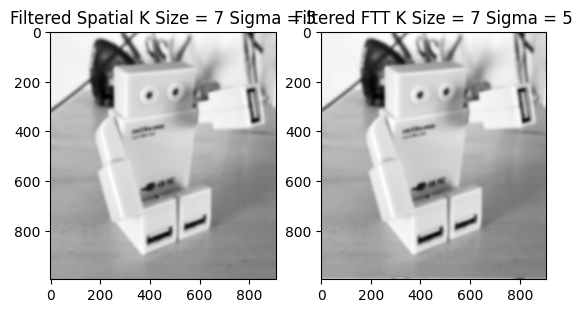

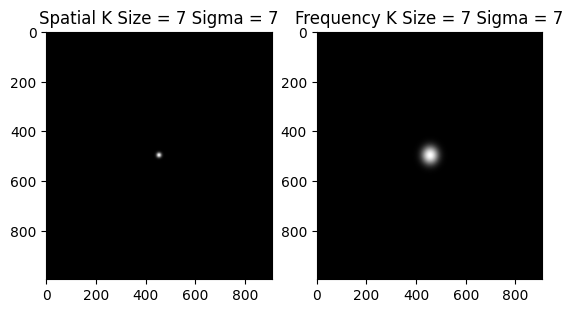

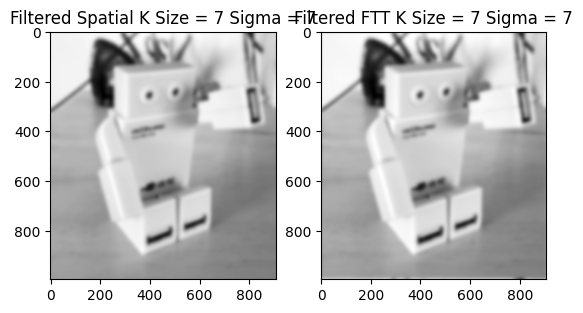

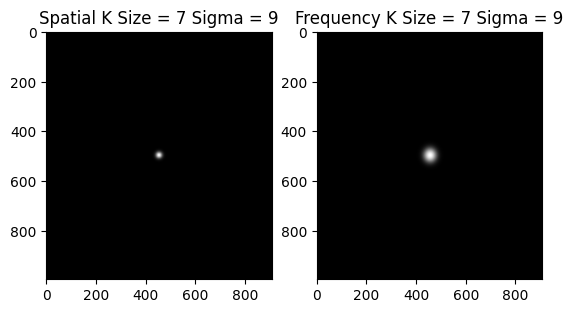

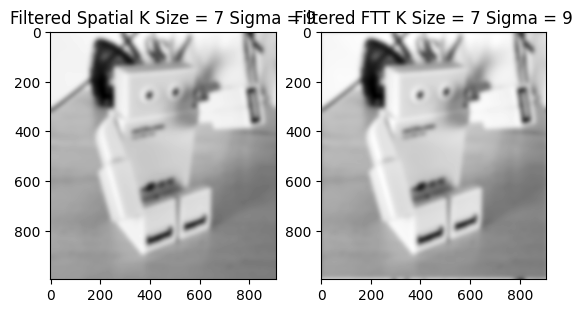

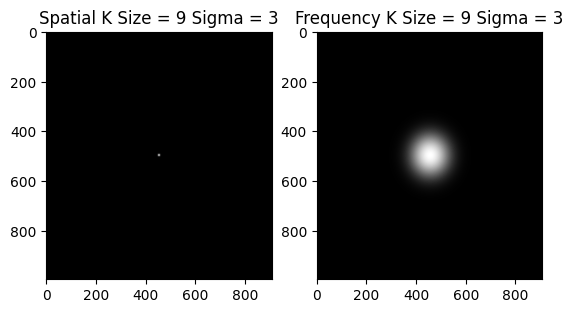

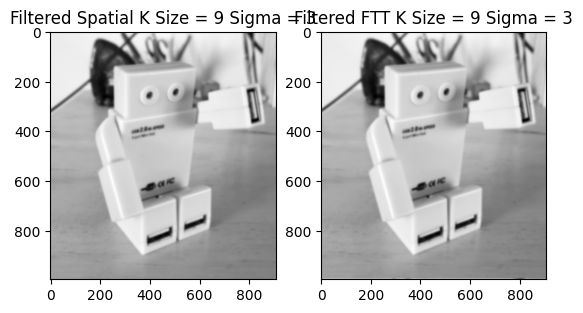

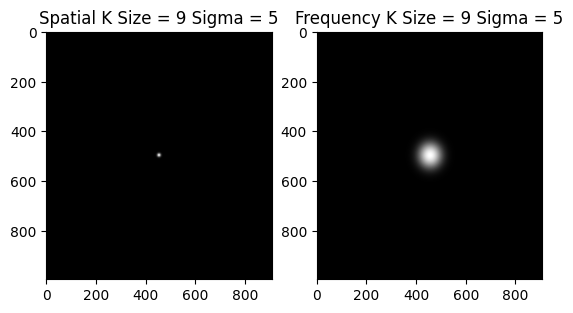

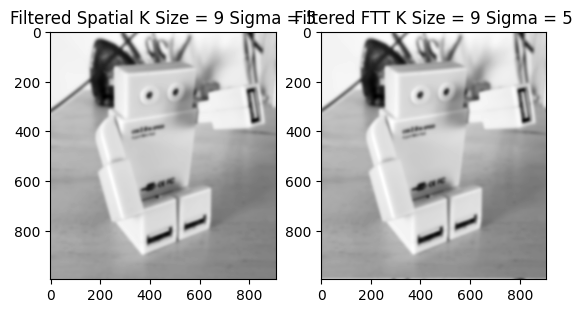

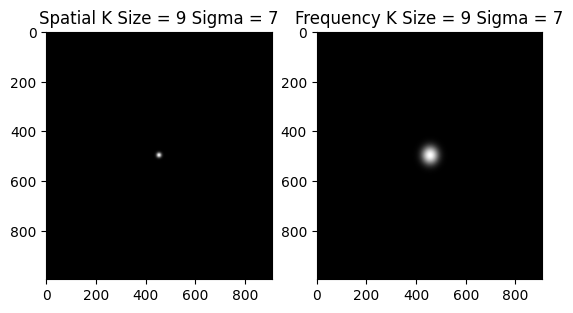

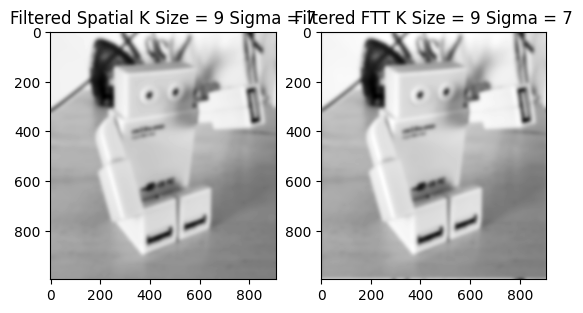

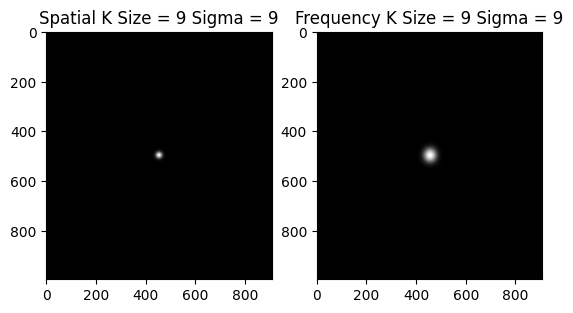

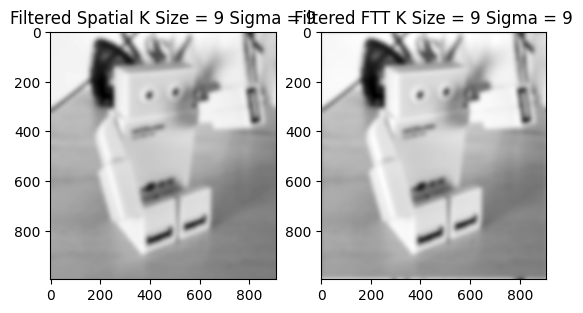

In [87]:
for k_size in [3, 5, 7, 9]:
    for sigma in [3, 5, 7, 9]:
        filter, fft = create_gauss_filter(image.shape[0], image.shape[1], k_size, sigma)

        # Mostrar el filtro gaussiano en el dominio espacial
        plt.subplot(1, 2, 1)
        plt.imshow(filter, cmap='gray')
        plt.title(f'Spatial K Size = {k_size} Sigma = {sigma}')

        # Mostrar el filtro gaussiano en el dominio de la frecuencia (transformada de Fourier)
        plt.subplot(1, 2, 2)
        plt.imshow(np.log(1 + np.abs(np.fft.fftshift(fft))), cmap='gray')
        plt.title(f'Frequency K Size = {k_size} Sigma = {sigma}')

        plt.show()

        plt.subplot(1, 2, 1)

        filtered_spatial = cv.filter2D(image, -1, filter)
        plt.imshow(filtered_spatial, cmap='gray')
        plt.title(f"Filtered Spatial K Size = {k_size} Sigma = {sigma}")
        
        plt.subplot(1, 2, 2)

        img_fft = np.fft.fft2(image)
        filtered = img_fft * fft
        img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

        plt.imshow(img_gauss, cmap='gray')
        plt.title(f"Filtered FTT K Size = {k_size} Sigma = {sigma}")

        plt.show()